Matplotlib is building the font cache; this may take a moment.


Concentration of A: 23.8639 g/L
Concentration of B: 48.3823 g/L
Concentration of C: 22.8685 g/L


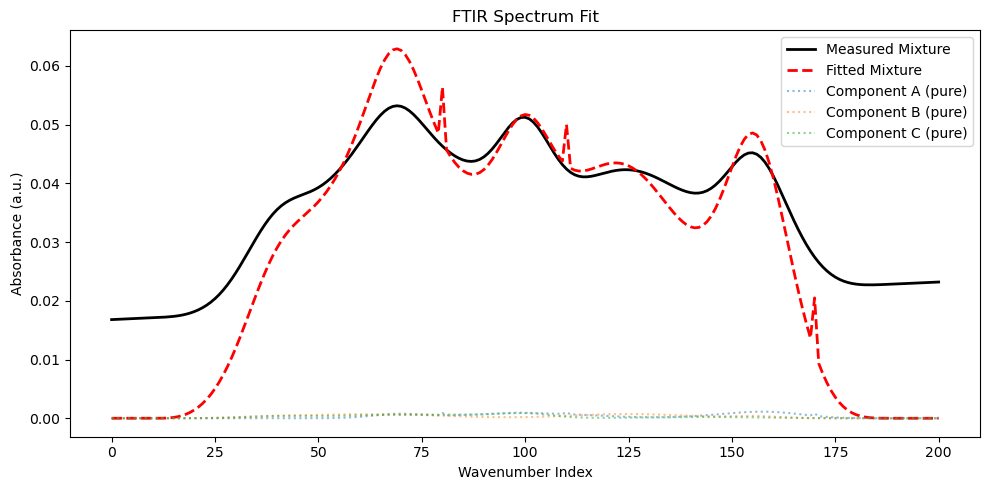

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Load data
components = np.load("components.npy")        # shape: (3, N)
mixture = np.load("mixture_spectrum.npy")     # shape: (N,)

# X shape (N, 3), y shape (N,)
X = components.T
y = mixture

# Least squares fit (can add rcond=None for numpy < 1.14)
concentrations, residuals, rank, s = np.linalg.lstsq(X, y, rcond=None)

# Reconstruct mixture from fit
fitted_mixture = X @ concentrations

# Print concentrations
component_names = ['A', 'B', 'C']
for name, conc in zip(component_names, concentrations):
    print(f"Concentration of {name}: {conc:.4f} g/L")

# Plot
plt.figure(figsize=(10, 5))

plt.plot(y, label="Measured Mixture", color="black", linewidth=2)
plt.plot(fitted_mixture, label="Fitted Mixture", color="red", linestyle="--", linewidth=2)

# Optional: plot pure component spectra
for i, spec in enumerate(components):
    plt.plot(spec, label=f"Component {component_names[i]} (pure)", alpha=0.5, linestyle=":")

plt.xlabel("Wavenumber Index")
plt.ylabel("Absorbance (a.u.)")
plt.title("FTIR Spectrum Fit")
plt.legend()
plt.tight_layout()
plt.show()


In [2]:
import numpy as np

# Load the data
components = np.load("components.npy")        # shape: (3, N)
mixture = np.load("mixture_spectrum.npy")     # shape: (N,)

# Transpose components to shape (N, 3) for fitting
X = components.T  # Now shape is (N, 3)
y = mixture       # shape (N,)

# Solve for concentrations using least squares
concentrations, residuals, rank, s = np.linalg.lstsq(X, y, rcond=None)

# Print the results
component_names = ['A', 'B', 'C']
for name, conc in zip(component_names, concentrations):
    print(f"Concentration of {name}: {conc:.4f} g/L")


Concentration of A: 23.8639 g/L
Concentration of B: 48.3823 g/L
Concentration of C: 22.8685 g/L


In [3]:
import numpy as np

# Step 1: Load the FTIR data for the pure components
components = np.load("components.npy")  # This should be a 3xN array
print("Shape of components array:", components.shape)

# Step 2: Load the FTIR data for the mixture
mixture = np.load("mixture_spectrum.npy")  # This should be a 1D array with N values
print("Shape of mixture array:", mixture.shape)

# Step 3: Check dimensions to be sure they match
num_components, num_points = components.shape
if mixture.shape[0] != num_points:
    print("Error: The mixture spectrum and components must have the same number of points.")
    exit(1)

# Step 4: Prepare the "X" matrix and "y" vector for fitting
X = components.T  # Make X with shape (N, 3)
y = mixture       # y is shape (N,)

print("X shape:", X.shape)
print("y shape:", y.shape)

# Step 5: Use least squares fitting to estimate concentrations
result = np.linalg.lstsq(X, y, rcond=None)
concentrations = result[0]
residuals = result[1]
rank = result[2]
singular_values = result[3]

print("Least squares result (concentrations):", concentrations)
print("Residuals:", residuals)
print("Rank of matrix:", rank)
print("Singular values:", singular_values)

# Step 6: Print out the concentrations with labels
names = ['A', 'B', 'C']
for i in range(len(concentrations)):
    print("Estimated concentration of", names[i], ":", concentrations[i], "g/L")

# Step 7: Reconstruct the fitted mixture spectrum and show the error (not necessary but good for learning)
fitted = X @ concentrations
error = y - fitted
print("Mean squared error of fit:", np.mean(error**2))


Shape of components array: (3, 201)
Shape of mixture array: (201,)
X shape: (201, 3)
y shape: (201,)
Least squares result (concentrations): [23.86391911 48.38234986 22.86854955]
Residuals: [0.02654426]
Rank of matrix: 3
Singular values: [0.00949373 0.00370867 0.00267458]
Estimated concentration of A : 23.863919108828576 g/L
Estimated concentration of B : 48.382349863663066 g/L
Estimated concentration of C : 22.868549551863122 g/L
Mean squared error of fit: 0.00013206099548387928


/tmp/xpython_42/406780584.py:2: UserWarning: A NumPy version >=1.23.5 and <2.3.0 is required for this version of SciPy (detected version 2.3.1)
  from scipy.optimize import curve_fit


Estimated concentration of A: 23.8639 g/L
Estimated concentration of B: 48.3823 g/L
Estimated concentration of C: 22.8685 g/L


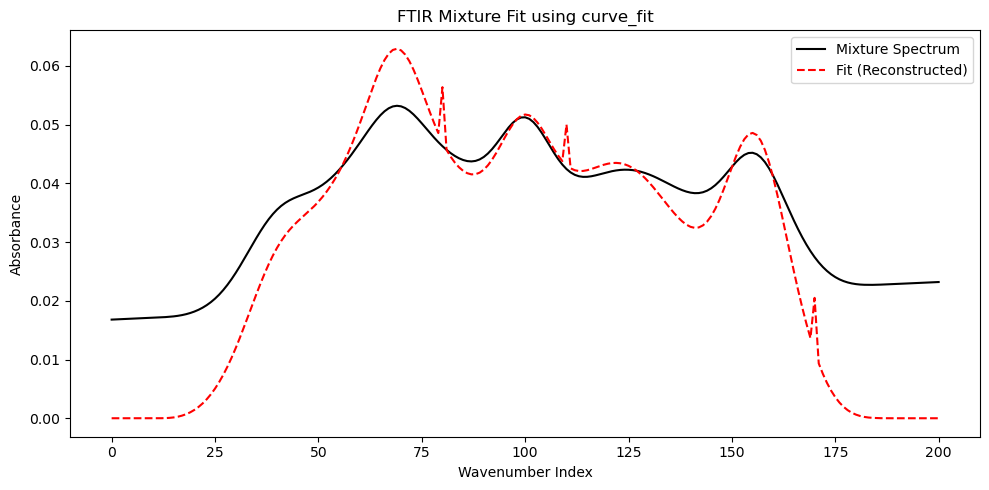

In [4]:
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

# 1. Load data
components = np.load("components.npy")      # shape (3, N)
mixture = np.load("mixture_spectrum.npy")   # shape (N,)

# 2. Define the model function for fitting
def mixture_model(x, cA, cB, cC):
    # x is dummy, not used (for curve_fit compatibility)
    return cA * components[0] + cB * components[1] + cC * components[2]

# 3. Prepare dummy x values (not used)
N = mixture.shape[0]
x_dummy = np.arange(N)

# 4. Initial guesses for concentrations (start with 1 for all)
initial_guess = [1, 1, 1]

# 5. Fit the model to the data using curve_fit
popt, pcov = curve_fit(mixture_model, x_dummy, mixture, p0=initial_guess)

# 6. Print the results
names = ['A', 'B', 'C']
for name, val in zip(names, popt):
    print(f"Estimated concentration of {name}: {val:.4f} g/L")

# 7. Optional: Plot the data and fit
fitted_mixture = mixture_model(x_dummy, *popt)
plt.figure(figsize=(10,5))
plt.plot(x_dummy, mixture, label="Mixture Spectrum", color='black')
plt.plot(x_dummy, fitted_mixture, '--', label="Fit (Reconstructed)", color='red')
plt.xlabel("Wavenumber Index")
plt.ylabel("Absorbance")
plt.title("FTIR Mixture Fit using curve_fit")
plt.legend()
plt.tight_layout()
plt.show()


In [5]:
import numpy as np
from scipy.optimize import curve_fit

# Load data
components = np.load("components.npy")      # shape (3, N)
mixture = np.load("mixture_spectrum.npy")   # shape (N,)

# Define the mixture model
def mixture_model(x, cA, cB, cC):
    return cA * components[0] + cB * components[1] + cC * components[2]

# Dummy x data (not used)
x_dummy = np.arange(mixture.size)

# Fit the model to the data
popt, pcov = curve_fit(mixture_model, x_dummy, mixture, p0=[1, 1, 1])

# Print results
for name, c in zip(['A', 'B', 'C'], popt):
    print(f"Estimated concentration of {name}: {c:.4f} g/L")


Estimated concentration of A: 23.8639 g/L
Estimated concentration of B: 48.3823 g/L
Estimated concentration of C: 22.8685 g/L


In [6]:
import numpy as np
from scipy.optimize import curve_fit

components = np.load("components.npy")
mixture = np.load("mixture_spectrum.npy")

def model(x, cA, cB, cC):
      return cA * components[0] + cB * components[1] + cC * components [2]

x_extra = np.arrange(mixture.size) # dummy just to satisfy the input requirement of curve_fit

initial_guess= [1,1,1]

component_name = ['A','B','C']

popt, pcov = curve_fit(model, x_extra, mixture, p0 = initial_guess)


for i in range(len(component_name)):
      name = component_name[i]
      conc = popt[i]
      print(f"Concentration of {name} is {c:.3f}g/L")

<class 'AttributeError'>: module 'numpy' has no attribute 'arrange'

In [7]:
import numpy as np
from scipy.optimize import curve_fit

components = np.load("components.npy")
mixture = np.load("mixture_spectrum.npy")

def model(x, cA, cB, cC):
      return cA * components[0] + cB * components[1] + cC * components [2]

x_extra = np.arange(mixture.size) # dummy just to satisfy the input requirement of curve_fit

initial_guess= [1,1,1]

component_name = ['A','B','C']

popt, pcov = curve_fit(model, x_extra, mixture, p0 = initial_guess)


for i in range(len(component_name)):
      name = component_name[i]
      conc = popt[i]
      print(f"Concentration of {name} is {c:.3f}g/L")

Concentration of A is 22.869g/L
Concentration of B is 22.869g/L
Concentration of C is 22.869g/L


In [8]:
import numpy as np
from scipy.optimize import curve_fit

components = np.load("components.npy")
mixture = np.load("mixture_spectrum.npy")

def model(x, cA, cB, cC):
    return cA * components[0] + cB * components[1] + cC * components[2]

x_extra = np.arange(mixture.size) # dummy just to satisfy the input requirement of curve_fit

initial_guess = [1, 1, 1]

component_names = ['A', 'B', 'C']

popt, pcov = curve_fit(model, x_extra, mixture, p0=initial_guess)

for i in range(len(component_names)):
    name = component_names[i]
    conc = popt[i]
    print(f"Concentration of {name} is {conc:.3f} g/L")


Concentration of A is 23.864 g/L
Concentration of B is 48.382 g/L
Concentration of C is 22.869 g/L


In [9]:
import numpy as np
from scipy.optimize import curve_fit

components = np.load("components.npy")
mixture = np.load("mixture_spectrum.npy")

def model(x, cA, cB, cC):
      return cA * components[0] + cB * components[1] + cC * components [2]

x_extra = np.arange(mixture.size) # dummy just to satisfy the input requirement of curve_fit

initial_guess= [1,1,1]

component_name = ['A','B','C']

popt, pcov = curve_fit(model, x_extra, mixture, p0 = initial_guess)


for i in range(len(component_name)):
      name = component_name[i]
      conc = popt[i]
      print(f"Concentration of {name} is {conc:.3f}g/L")

Concentration of A is 23.864g/L
Concentration of B is 48.382g/L
Concentration of C is 22.869g/L


In [10]:
import numpy as np
from scipy.optimize import curve_fit

components = np.load("components.npy")
mixture = np.load("mixture_spectrum.npy")

def model(x, cA, cB, cC):
      return cA * components[0] + cB * components[1] + cC * components [2]

x_extra = np.arange(mixture.size) # dummy just to satisfy the input requirement of curve_fit

initial_guess= [1,1,1]

component_name = ['A','B','C']

popt, pcov = curve_fit(model, x_extra, mixture, p0 = initial_guess)


for i in range(len(component_name)):
      name = component_name[i]
      conc = popt[i]
      print(f"Concentration of {name} is {conc:.3f}g/L")

Concentration of A is 23.864g/L
Concentration of B is 48.382g/L
Concentration of C is 22.869g/L


In [11]:
import numpy as np
from scipy.optimize import curve_fit

components = np.load("components.npy")
mixture = np.load("mixture_spectrum.npy")

def model(x, cA, cB, cC): # define a model describing the mixture as a linear combi of components
      return cA * components[0] + cB * components[1] + cC * components [2]

x_extra = np.arange(mixture.size) # dummy just to satisfy the input requirement of curve_fit

initial_guess= [1,1,1] # initial values for the concentrations

component_name = ['A','B','C']

popt, pcov = curve_fit(model, x_extra, mixture, p0 = initial_guess) # fit the model to data


for i in range(len(component_name)):
      name = component_name[i]
      conc = popt[i]
      print(f"Concentration of {name} is {conc:.3f}g/L")

Concentration of A is 23.864g/L
Concentration of B is 48.382g/L
Concentration of C is 22.869g/L
